<a href="https://colab.research.google.com/github/imVnaveen7/DS_GUVI_practice_projects/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.shape

(15, 2)

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
df.drop_duplicates()
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
#to find outlier of our data set
col=df.columns.tolist()
for i in col:
  IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
  upper_threshold= df[i].quantile(0.75)+(1.5*IQR)
  lower_threshold= df[i].quantile(0.25)-(1.5* IQR)
  print("Outlier of",i,"range from",lower_threshold,"to",upper_threshold)

Outlier of Chirps/Second range from 12.9 to 19.699999999999996
Outlier of Ground Temperature range from 58.400000000000006 to 98.4


No Outlier present in our data frame, so let's do **EDA**

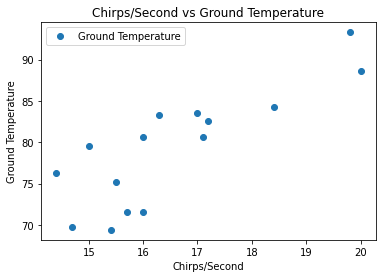

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()
df.corr()

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
#train test split
x=df.loc[:,['Chirps/Second']].values
y=df.loc[:,['Ground Temperature']].values
X_train, X_test, Y_train, Y_test=train_test_split(x, y,test_size=0.25, random_state=2)
(X_train.shape , X_test.shape)

((11, 1), (4, 1))

Linear Regression

1.   **y=mx + c**
2.   m ---> coefficient

1.   c ---> intercept





In [ ]:
#Linearregression
model=LinearRegression()
model.fit(X_train, Y_train)

#co-efficient of Linear regression model   #M
print(model.coef_[0][0])


#intercept of linear regression model     #C
print(model.intercept_[0])


3.7247928176795564
17.961774861878474


**2.Chart the original data and the equation on the chart.**

In [ ]:
test_predict=model.predict(X_test).tolist()

new_set1=[]
new_set2=[]
for i,j in zip(test_predict,Y_test.tolist()):
  new_set1=new_set1+i
  new_set2=new_set2+j
new_set={"Original data":new_set2,
             "Predict data":new_set1}
new_dataset=pd.DataFrame(new_set)
new_dataset


,Original data,Predict data
0,82.6,82.028211
1,80.6,81.655732
2,75.2,75.696064
3,88.6,92.457631


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(18, 75, 'Y(x)=mx + c')

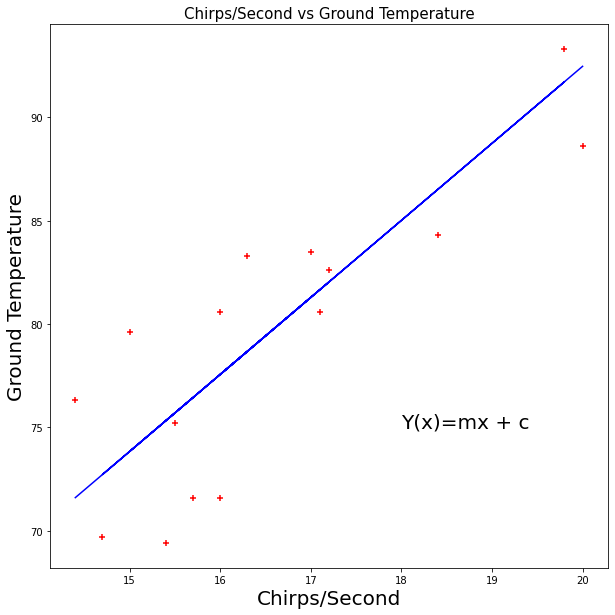

In [154]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title("Chirps/Second vs Ground Temperature",fontsize=15)
plt.xlabel("Chirps/Second",fontsize=20)
plt.ylabel("Ground Temperature", fontsize=20)
plt.scatter(df['Chirps/Second'],df['Ground Temperature'],color='red',marker='+')
plt.plot(df["Chirps/Second"],model.predict(df[["Chirps/Second"]]),color="blue")
plt.text(18,75,r'Y(x)=mx + c',fontsize=20)

**3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
#R2 score method for finding accuracy
model.score(X_test,Y_test)

0.8196483067037376

Hence, above equation is fit for data

**4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [132]:
regressor=LinearRegression()
regressor.fit(Y_train, X_train)

LinearRegression()

In [135]:
regressor.score(Y_test, X_test)

0.5868426358763332

In [145]:
input_data=[[95]]
reg_output=regressor.predict(input_data)
print("The approximate expected crickets to be chirping is:",reg_output[0][0])

The approximate expected crickets to be chirping is: 19.10568196038543


**5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [144]:
model_pred=model.predict([[18]])
print("The approximate ground temperature in day morning is:",model_pred[0][0],"°F")

The approximate ground temperature in day morning is: 85.00804558011049 °F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [209]:
df = pd.read_fwf("/content/brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [210]:
df.shape

(62, 2)

In [211]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [212]:
df.drop_duplicates()
df.shape

(62, 2)

In [213]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [214]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


upper threshold outlier is present here.

In [215]:
df.value_counts(ascending=True)

Brain     Body   
0.005     0.14       1
3.500     10.80      1
3.600     21.00      1
4.050     17.00      1
4.190     58.00      1
                    ..
1.700     6.30       1
2.000     12.30      1
2.500     12.10      1
0.550     2.40       1
6654.000  5712.00    1
Length: 62, dtype: int64

In [216]:
#Outlier detecting
IQR=df.quantile(0.75)-df.quantile(0.25)
upper=df.quantile(0.75)+(1.5*IQR)
lower=df.quantile(0.25)-(1.5*IQR)
print(upper)
print(lower)

Brain    119.60625
Body     408.62500
dtype: float64
Brain    -70.80375
Body    -238.37500
dtype: float64


In [217]:
df.drop(df.index[(df["Brain"]>100)],axis=0,inplace=True)
df.shape

(52, 2)

In [218]:
df.drop(df.index[(df["Body"]>390)],axis=0,inplace=True)
df.shape

(50, 2)

**EDA**

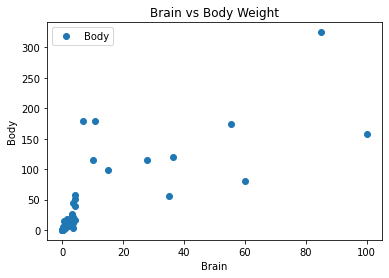

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


In [227]:
df.plot(x='Brain',y='Body',style="o")
plt.title('Brain vs Body Weight')
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()
df.corr()

correleation value is greater than 0.2. so, Linear Regression is valid

In [262]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(df[['Brain']],df.Body,test_size=.3,random_state=3)
x_train.shape,x_test.shape

((35, 1), (15, 1))

**1.Find the linear regression equation for this data for brain weight to body weight.**

In [260]:
#LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [254]:
lr.predict(x_test)

array([21.44700627, 29.68817322, 21.66707637, 25.1492273 , 21.45846825,
       30.71975183, 21.5730881 , 21.67395356, 28.31273506, 23.81963708])

Linear Regression equation is **y(x)=mx + c**

y ---> predicted target

m ---> coefficient


c ---> intercept





In [255]:
#coefficient
lr.coef_[0]

2.2923969269695093

In [256]:
#intercept
lr.intercept_

21.435544280405225

*2.Chart the* **original data and the equation** *on the chart.*

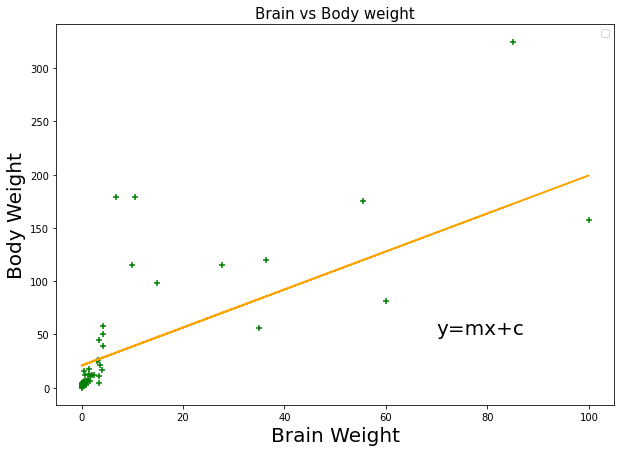

In [247]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.title("Brain vs Body weight",fontsize=15)
plt.xlabel("Brain Weight",fontsize=20)
plt.ylabel("Body Weight",fontsize=20)
plt.scatter(df.Brain, df.Body, color="green",marker="+")
plt.plot(df['Brain'],lr.predict(df[['Brain']]),color="orange")
plt.legend()
plt.text(70,50,r'y=mx+c',fontsize=20)
plt.show()

*3.Find the equation's*  **R2  score (use the .score method)** *to determine whether the equation is a good fit for this data.* **(0.8 and greater is considered a strong correlation.)**

In [261]:
#R2 score method
x_test_prediction=lr.predict(x_test)
metrics.r2_score(y_test,x_test_prediction)

0.5261500008070958

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [308]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [309]:
df.shape

(52, 6)

In [310]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [311]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [312]:
df.drop_duplicates()
df.shape

(52, 6)

In [313]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


no outlier present in our data

**EDA**

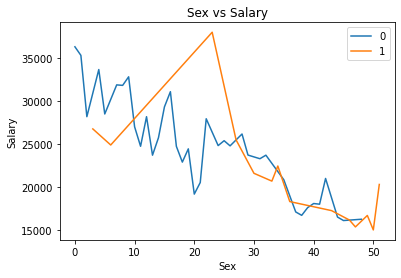

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [314]:
#sex vs Salary
df.groupby("Sex")["Salary"].plot()
plt.title("Sex vs Salary")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.legend()
plt.show()
df[["Sex","Salary"]].corr()

correleation satisfies for linear regression model, 0--> female, 1---> male

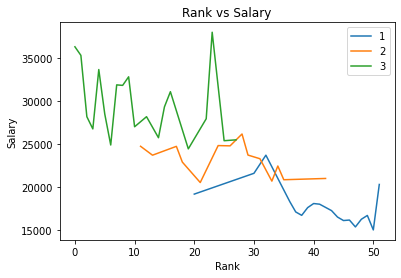

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [315]:
#Rank vs Salary
df.groupby("Rank")['Salary'].plot()
plt.title('Rank vs Salary')
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.legend()
plt.show()
df[["Rank","Salary"]].corr()

correleation is satisfies for linear regresson model

> Rank. 1 ---> for assistant professor, 2 ---> for associate professor, 3 --->for full professor






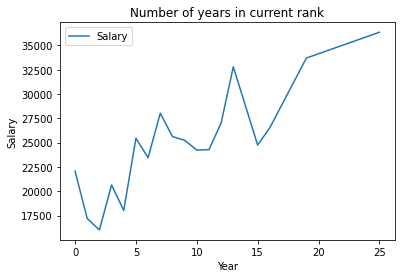

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [316]:
#Year vs Salary
df.groupby("Year")["Salary"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Salary")
plt.title("Number of years in current rank")
plt.legend()
plt.show()
df[['Year','Salary']].corr()

correleation satisfies the linear regression model

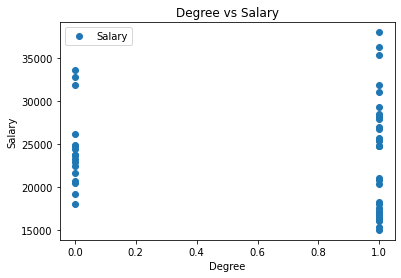

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [323]:
#Degree vs Salary
df['Degree']=np.cbrt(df['Degree'])
df.plot(x='Degree',y='Salary',style='o')
plt.title("Degree vs Salary")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.legend()
plt.show()
df[['Degree','Salary']].corr()

there is a no linear relationship between Degree vs Salary. so we can drop this feature

In [325]:
#drop the Degree feature
df=df.drop(columns='Degree',axis=1)
df.shape

(52, 5)

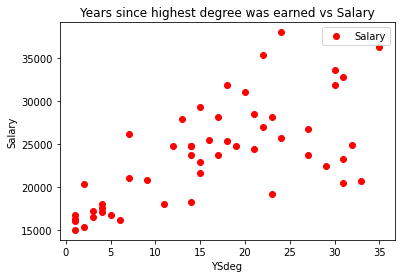

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [324]:
# Years since highest degree was earned vs Salary
df.plot(x='YSdeg',y='Salary',style='o',color='red')
plt.xlabel("YSdeg")
plt.ylabel("Salary")
plt.title("Years since highest degree was earned vs Salary")
plt.show()
df[['YSdeg','Salary']].corr()

its give high correleation value.hence satisfies the linear regression model

**1.Find the linear regression equation for this data using columns 1-5 to column 6.**

In [331]:
#train test split
x=df.drop(columns='Salary',axis=1)
y=df[['Salary']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
x_train.shape,x_test.shape,y_test.shape


((36, 4), (16, 4), (16, 1))

In [332]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [335]:
lr.predict(x_test)

array([[28713.15808   ],
       [17854.17839456],
       [29188.51390319],
       [17645.08919849],
       [18313.4452208 ],
       [19595.51060624],
       [23056.59446963],
       [17645.08919849],
       [18007.09091889],
       [23538.42919514],
       [18313.4452208 ],
       [27990.68465176],
       [20594.31884229],
       [24683.04256595],
       [32041.37996646],
       [26778.82566921]])

In [339]:
#co-effcient of our model
lr.coef_[0]

array([ 417.64913888, 4683.91255196,  459.26682624,  -97.26510584])

In [340]:
#intercept of our model
lr.intercept_

array([12181.52578724])

*2.Find the selection of columns with the best*  **R2  score.**

In [343]:
y_pred=lr.predict(x_test)
metrics.r2_score(y_test,y_pred)

0.8093189396991667

*3.Report whether* **sex is a factor in salary.**

In [359]:
co_eff=pd.DataFrame(lr.coef_[0],["Sex","Rank","Year","YSdeg"],columns=['Coefficient'])

co_eff

,Coefficient
Sex,417.649139
Rank,4683.912552
Year,459.266826
YSdeg,-97.265106


**sex decrimination** happened against women in salary. this descrimination make major problem,compare than **Years since highest degree(YS deg)** feature in salary